**Business Problem Statement:** A building management company wants to predict energy consumption to optimize energy usage and reduce costs.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pathlib import Path

# Suppress all warnings
warnings.filterwarnings('ignore')
import random 

In [2]:
df=pd.read_csv('../Data/building_energy_data.csv') 

In [3]:
df.shape

(1000, 9)

In [4]:
df.head()

,BuildingID,BuildingSize,BuildingAge,InsulationType,Temperature,Humidity,EnergyConsumption,SupplierLeadTime,RenewableEnergySource
0,B0001,910,51,Poor,35.347140,14.848393,136.438375,23,NaN
1,B0002,3822,54,Fair,-3.381381,64.831627,270.517752,10,Solar
2,B0003,3142,24,Poor,19.650725,11.997298,310.402460,11,NaN
3,B0004,516,25,Good,19.956029,23.714734,70.034617,6,Solar
4,B0005,4476,71,Good,7.673037,46.286320,412.368667,6,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BuildingID             1000 non-null   object 
 1   BuildingSize           1000 non-null   int64  
 2   BuildingAge            1000 non-null   int64  
 3   InsulationType         1000 non-null   object 
 4   Temperature            1000 non-null   float64
 5   Humidity               1000 non-null   float64
 6   EnergyConsumption      1000 non-null   float64
 7   SupplierLeadTime       1000 non-null   int64  
 8   RenewableEnergySource  679 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [6]:
df.describe(include='all')

,BuildingID,BuildingSize,BuildingAge,InsulationType,Temperature,Humidity,EnergyConsumption,SupplierLeadTime,RenewableEnergySource
count,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,679
unique,1000,NaN,NaN,4,NaN,NaN,NaN,NaN,2
top,B1000,NaN,NaN,Good,NaN,NaN,NaN,NaN,Solar
freq,1,NaN,NaN,305,NaN,NaN,NaN,NaN,374
mean,NaN,2578.250000,50.149000,NaN,15.902084,49.384810,296.190255,14.646000,NaN
std,NaN,1390.960625,28.855874,NaN,14.235700,23.318803,162.629420,8.362692,NaN
min,NaN,53.000000,1.000000,NaN,-9.977861,10.014922,27.606296,1.000000,NaN
25%,NaN,1389.500000,26.000000,NaN,4.136905,28.924968,166.374887,8.000000,NaN
50%,NaN,2647.000000,49.000000,NaN,16.586662,49.393253,273.275106,14.500000,NaN
75%,NaN,3693.250000,75.250000,NaN,28.069674,70.030764,403.408926,22.000000,NaN


In [7]:
df['RenewableEnergySource'] = df['RenewableEnergySource'].fillna('None')

In [8]:
numerical_columns = ['BuildingSize',	'BuildingAge'	,'Temperature' ,	'Humidity' 	,'SupplierLeadTime']
categorical_columns = ['InsulationType'	, 'RenewableEnergySource']
target_column = ['EnergyConsumption']

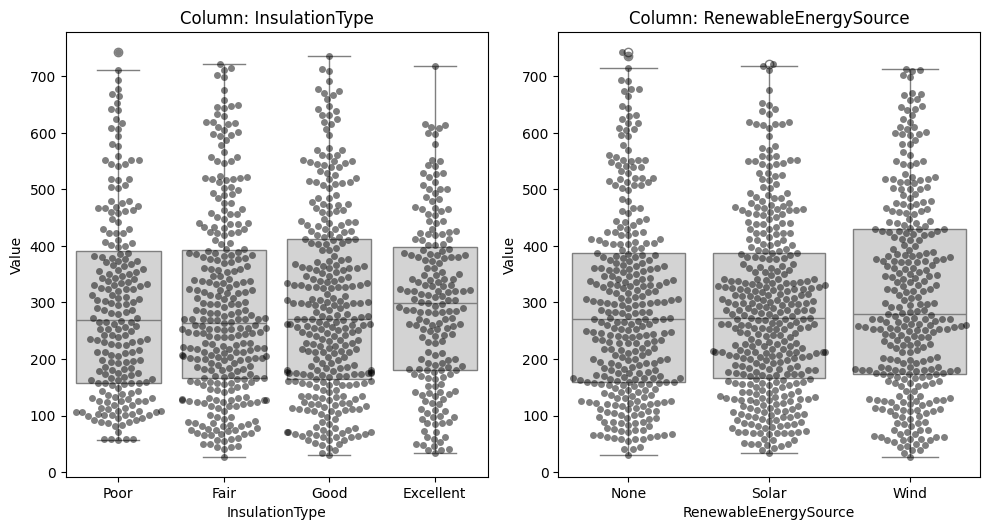

In [9]:
# Set the number of rows and columns for subplots (based on number of categories)
n_cols = 2  # Number of columns in the subplot grid
n_rows = 2 # Number of rows needed for the subplots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each category and create a plot
for idx, col in enumerate(categorical_columns):
    # Subset the data for the current category


    # Plot the data
    sns.boxplot(x=col, y='EnergyConsumption', data=df, color='lightgray',ax=axes[idx])  # Boxplot with light gray color
    sns.swarmplot(x=col, y='EnergyConsumption', data=df, color='black', alpha=0.5,ax=axes[idx])
    axes[idx].set_title(f'Column: {col}')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xlabel(col)

# Remove empty subplots if the number of categories doesn't fit evenly
for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust layout
plt.show()

After observing the above visualizations we can conclude that the above categorical independent columns 
are approximately uniformly distributed aganist to the target variable like Energy Consumption . 
All visulaizations seems to similar in ratio . 
So , we can conclude that independently these categorical columns are not showing much or desired impact on the 
Energy Consumption  .

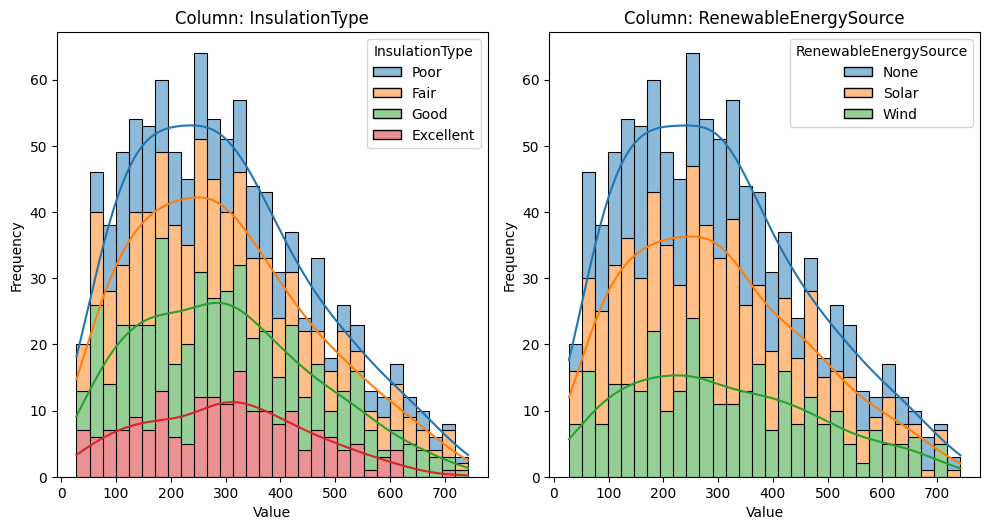

In [10]:
# Set the number of rows and columns for subplots (based on number of categories)
n_cols = 2  # Number of columns in the subplot grid
n_rows = 2 # Number of rows needed for the subplots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each category and create a plot
for idx, col in enumerate(categorical_columns):
    # Subset the data for the current category


    # Plot the data
    sns.histplot(df, x='EnergyConsumption', hue=col, kde=True, ax=axes[idx], multiple='stack', bins=30)
    axes[idx].set_title(f'Column: {col}')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_xlabel('Value')

# Remove empty subplots if the number of categories doesn't fit evenly
for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust layout
plt.show()

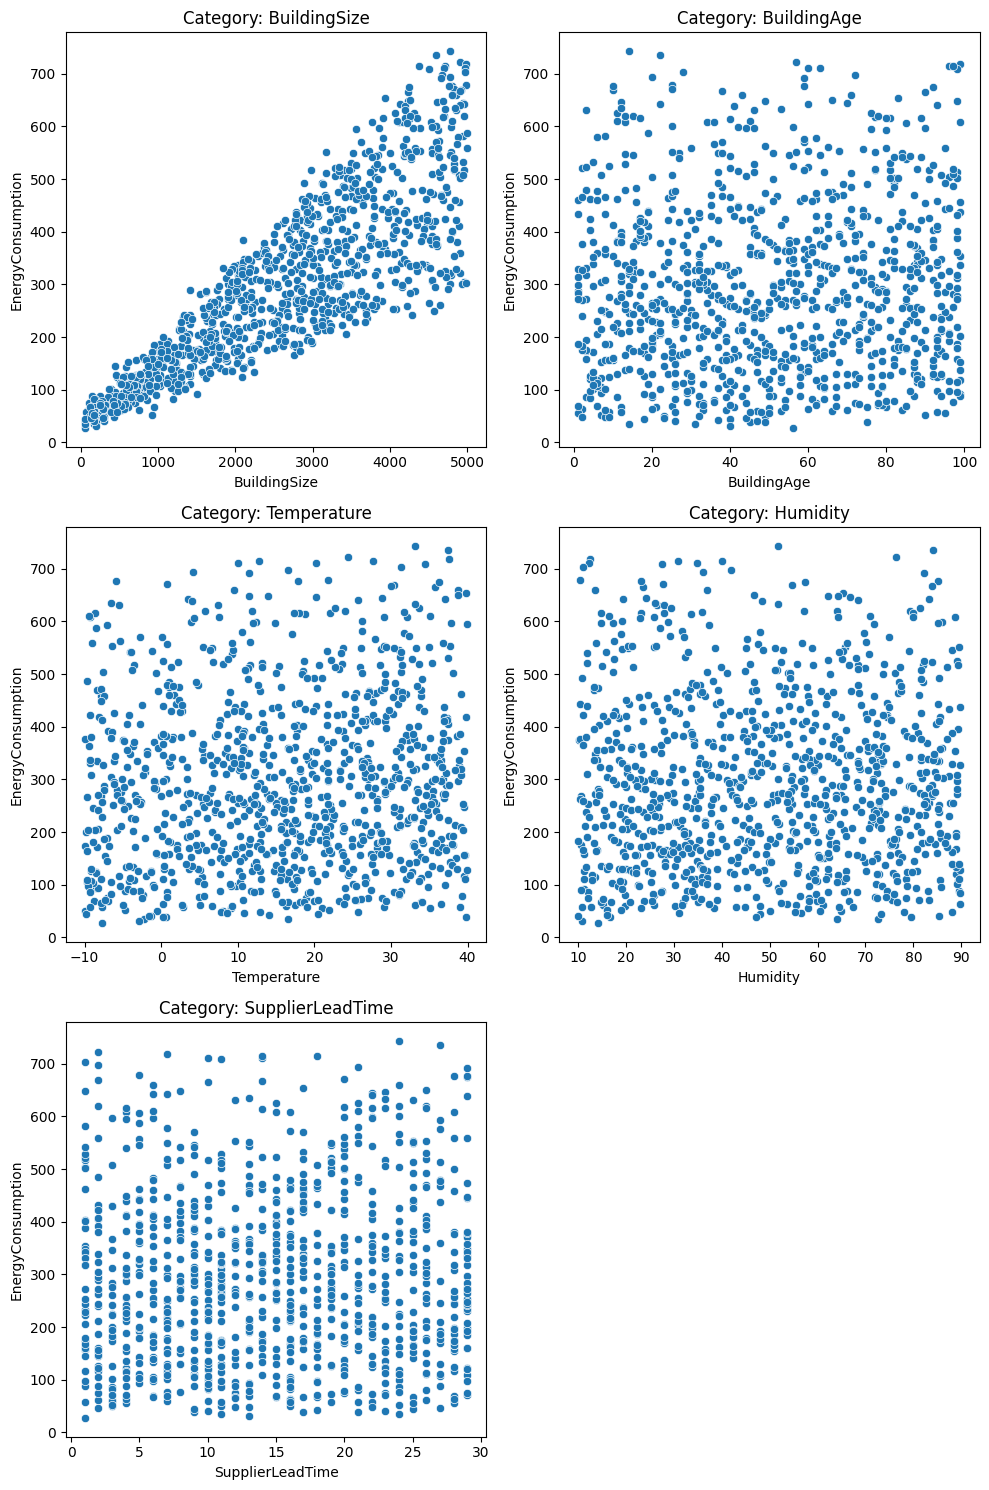

In [11]:
# Set the number of rows and columns for subplots (based on number of categories)
n_cols = 2  # Number of columns in the subplot grid
n_rows = 3  # Number of rows needed for the subplots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each category and create a plot
for idx, col in enumerate(numerical_columns):
    # Subset the data for the current category


    # Plot the data
    sns.scatterplot(x=col, y='EnergyConsumption', data=df, ax=axes[idx])
    axes[idx].set_title(f'Category: {col}')
    axes[idx].set_ylabel('EnergyConsumption')
    axes[idx].set_xlabel(col)

# Remove empty subplots if the number of categories doesn't fit evenly
for idx in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()  # Adjust layout
plt.show()

After observing the above visualizations we can conclude that the above numerical independent columns 
are approximately randomly distributed except building attribute .  
So , we can conclude that if building size increases the energy consumtion also increases and viceversa .